# This notebook contains all the EDA, Feature Engg. , Preprocessing, Training and Analysis of Validation data with evalution metrics and Conclusion

In [1]:
import pandas as pd
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pylab as plt
import numpy as np
import optuna


# EDA, Feature Engineering, Preprocessing

In [2]:
data = pd.read_csv('training_set.csv')

In [3]:
data.head() # Checking top values

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [4]:
# Remove Unnamed: 0 columns , possibley because of missing index=False in pd.to_csv

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [7]:
# Observe many columns have 0 values

In [8]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


`Observe that there are no NaN columns in dataset but many columns have 0 as value even at 75 percentile, these columns also have a very low variance which makes them not a suitable fetaure.

We select features with at least 50 precentile value being non-zero`

In [9]:
data_desc = data.describe()

In [10]:
select_feat = data_desc.loc['50%'][data_desc.loc['50%']!=0]

In [11]:
select_feat

X12     0.1400
X19     1.3100
X21     0.2350
X50     0.0660
X55     2.2635
X56    15.0000
X57    94.0000
Name: 50%, dtype: float64

In [12]:
select_df = data[['X12', 'X19', 'X21', 'X50', 'X55', 'X56', 'X57','Y']]

In [13]:
select_df.describe()

,X12,X19,X21,X50,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.553685,1.660939,0.818253,0.139252,5.047150,52.338107,283.059079,0.392327
std,0.876412,1.760214,1.210078,0.276309,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.140000,1.310000,0.235000,0.066000,2.263500,15.000000,94.000000,0.000000
75%,0.820000,2.637500,1.270000,0.188000,3.714000,43.000000,264.000000,1.000000
max,9.670000,18.750000,11.110000,9.752000,1102.500000,9989.000000,10062.000000,1.000000


`We look for outlier values , 
feature wise and remove some 110 
values in total across fetaures 
X57,X56,X55,X50`

In [14]:
# select_feat = select_feat.sample(frac=1,random_state=72,ignore_index=True)

In [15]:
select_df_no_outliers = select_df[(select_df.X57 < 3000)]
select_df_no_outliers = select_df_no_outliers[select_df_no_outliers.X56 < 1000]
select_df_no_outliers = select_df_no_outliers[select_df_no_outliers.X55 < 50]
select_df_no_outliers = select_df_no_outliers[select_df_no_outliers.X50 < 1]

In [16]:
select_df_no_outliers.describe()

,X12,X19,X21,X50,X55,X56,X57,Y
count,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000,3793.000000
mean,0.552984,1.675829,0.805009,0.124044,3.160672,40.962826,235.016082,0.385447
std,0.879121,1.768352,1.191685,0.168805,3.201992,89.367040,373.214415,0.486765
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.560000,6.000000,34.000000,0.000000
50%,0.140000,1.320000,0.230000,0.064000,2.227000,14.000000,92.000000,0.000000
75%,0.810000,2.640000,1.250000,0.183000,3.621000,39.000000,249.000000,1.000000
max,9.670000,18.750000,11.110000,0.976000,49.866000,887.000000,2923.000000,1.000000


`Removing these outlier values helps in 
reducing the value of mean, variance, sd 
bringing them closer to general distribution of values in selected fetaures and helps the model in generalizing well`

In [17]:
select_df_no_outliers = select_df_no_outliers.sample(frac=1,random_state=10,ignore_index=True)

In [18]:
select_df_no_outliers

,X12,X19,X21,X50,X55,X56,X57,Y
0,0.00,0.00,0.00,0.578,3.800,15,19,1
1,0.00,0.00,0.00,0.763,2.285,10,16,0
2,0.28,1.97,0.00,0.103,1.403,18,80,0
3,3.22,0.00,0.00,0.526,1.571,3,11,0
4,3.22,0.00,0.00,0.000,1.818,9,20,0
...,...,...,...,...,...,...,...,...
3788,0.00,2.32,0.00,0.000,2.473,10,47,0
3789,0.67,2.68,0.00,0.537,2.604,17,112,0
3790,0.00,4.83,0.00,0.000,1.700,5,17,1
3791,0.29,1.16,1.16,0.086,3.591,37,352,1


# Model Training and Analysis


In [19]:
X=select_df_no_outliers.iloc[:,:-1].values
# Normalizing
x_scaled = min_max_scaler.fit_transform(X)

Y=select_df_no_outliers.iloc[:,-1].values

In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(x_scaled, Y, test_size=0.2, random_state=10)

In [23]:
print("No. of Train Samples")
print(X_train.shape , Y_train.shape)
print("No. of Val Samples")
print(Y_val.shape  , Y_val.shape)

No. of Train Samples
(3034, 7) (3034,)
No. of Val Samples
(759,) (759,)


In [24]:
model = xgb.XGBClassifier()
model.fit(X_train,Y_train,verbose=True)
Y_pred = model.predict(X_val)
print(accuracy_score(Y_val,Y_pred)*100)

89.06455862977603


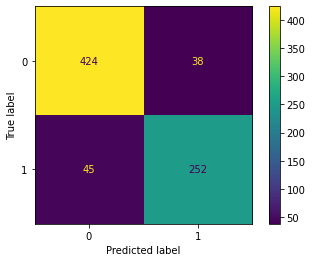

In [26]:
cm = confusion_matrix(y_true=Y_val,y_pred=Y_pred)
ConfusionMatrixDisplay(cm).plot()

#### I used optuna library for Hyper Parameter Tuning, below I have commented the code after taking the best HP values and using them for training

In [27]:

# def objective(trial):
#     # Define hyperparameters to optimize
#     params = {
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'max_depth': trial.suggest_int('max_depth', 3, 9),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#     }

#     tuned_model =xgb.XGBClassifier(**params)
#     tuned_model.fit(X_train, Y_train)
#     y_pred_tuned = tuned_model.predict(X_val)
#     accuracy = accuracy_score(Y_val, y_pred_tuned)
#     return accuracy

# # Create an Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100,show_progress_bar=True)  # You can adjust the number of trials

# # Get the best hyperparameters
# best_params = study.best_params
# print(f"Best hyperparameters: {best_params}")


[I 2024-03-08 01:45:56,370] A new study created in memory with name: no-name-27c60619-d617-4989-a440-64c7ae7d7778


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-03-08 01:45:56,648] Trial 0 finished with value: 0.8787878787878788 and parameters: {'learning_rate': 0.0971478715980467, 'max_depth': 4, 'subsample': 0.7014547059045118}. Best is trial 0 with value: 0.8787878787878788.
[I 2024-03-08 01:45:56,822] Trial 1 finished with value: 0.8748353096179183 and parameters: {'learning_rate': 0.2713101803854854, 'max_depth': 3, 'subsample': 0.8472407623870454}. Best is trial 0 with value: 0.8787878787878788.
[I 2024-03-08 01:45:57,122] Trial 2 finished with value: 0.8945981554677207 and parameters: {'learning_rate': 0.26541706934856457, 'max_depth': 6, 'subsample': 0.8044911519718918}. Best is trial 2 with value: 0.8945981554677207.
[I 2024-03-08 01:45:57,484] Trial 3 finished with value: 0.8853754940711462 and parameters: {'learning_rate': 0.17299116500411268, 'max_depth': 7, 'subsample': 0.6543594345126755}. Best is trial 2 with value: 0.8945981554677207.
[I 2024-03-08 01:45:57,847] Trial 4 finished with value: 0.8932806324110671 and parame


`best_params : {'learning_rate': 0.22588838191694433,
 'max_depth': 9,
 'subsample': 0.9735043255129058}`

### Training Model using best parameters as generated by optuna

In [32]:
model_2 = xgb.XGBClassifier(**best_params)
model_2.fit(X_train,Y_train,verbose=True)
Y_pred_2 = model_2.predict(X_val)
print(accuracy_score(Y_val,Y_pred_2)*100)

90.11857707509881


`We observe an increase in accuracy of model by around 1% after using these hyper parameters`

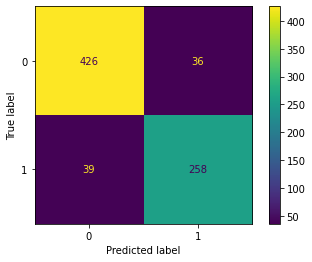

In [34]:
cm_2 = confusion_matrix(y_true=Y_val,y_pred=Y_pred_2)
ConfusionMatrixDisplay(cm_2).plot()

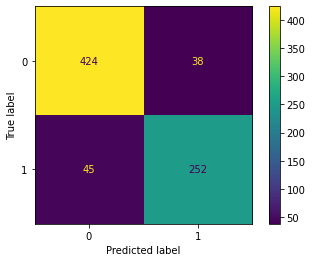

In [35]:
cm = confusion_matrix(y_true=Y_val,y_pred=Y_pred)
ConfusionMatrixDisplay(cm).plot()

# Observations and Conclusion

In [36]:
print("-"*100)
print(" Base Model ")
print(f"FPR - { round((cm[0][1]/(cm[0][1]+cm[0][0]))*100,3)} % ; FNR - { round ((cm[1][0]/(cm[1][0]+cm[1][1]))*100,3)}")
print("-"*100)
print(classification_report(y_true=Y_val,y_pred=Y_pred))
print("-"*100)
print(" Tuned Model ")
print(f"FPR - { round((cm_2[0][1]/(cm_2[0][1]+cm_2[0][0]))*100,3)} % ; FNR - { round ((cm_2[1][0]/(cm_2[1][0]+cm_2[1][1]))*100,3)}")

print("-"*100)
print(classification_report(y_true=Y_val,y_pred=Y_pred_2))

----------------------------------------------------------------------------------------------------
 Base Model 
FPR - 8.225 % ; FNR - 15.152
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       462
           1       0.87      0.85      0.86       297

    accuracy                           0.89       759
   macro avg       0.89      0.88      0.88       759
weighted avg       0.89      0.89      0.89       759

----------------------------------------------------------------------------------------------------
 Tuned Model 
FPR - 7.792 % ; FNR - 13.131
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       462
           1       0.88      0.87      0.87       297

    accuracy        

1. We can clearly observe a 1% increase in overall accuracy 
2. Class wise we observe 2%(Class:0) and 1%(Class:1) inc. in Precision
3. We observe 2%(Class:1) inc. in Recall
4. Class wise we observe 1%(Class:0) and 1%(Class:1) inc. in f1-score
5. There is sharp decrease of 5.2% in FPR and 15.4% decrease in FNR.
6. As the classes are imbalanced, weighted avg which uses the support values of each class gives a better performance metric of the model.
7. Here the weighted avg is greater than macro avg which is a positive sign.

Hence, we select the model_2 (Tuned Model )



In [39]:
# saving the best model
# model_2.save_model('.model/bestModel.json')

In the Tuned model we observe that it has a really good precision and recall for class 0 but not for class 1, we require more samples for class 1 to make the model generalize well over this class too. However precision value is still closer

Consider Class 0 as False and Class 1 as True.
Here FPR is 7.792, which means the model is wrongly predicting class 0 as class 1 every 78 out of 1000 times, In any kind of system be it credit risk, fraud detection etc. this much FPR is very risky and we need to reduce it.

Similary a very high FNR of 13.13% is not good as every 1 out of 8 True samples are getting rejected , this makes the model a big failure in real world sceanrios.

`Conclusion/ Future Scope` : The model needs to be trained on more data and on a better variation needs to be provided in the training model, also class imabalance needs to be taken care of. To start the experiment process on the given type of dataset, this model seems good, a better data selection and hyperparameter tuning will help in getting good results.

 